In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import os

In [2]:
# Get the current working directory
current_directory = os.getcwd()
print("Current directory:", current_directory)

file_path=os.path.join(current_directory,"Transformed_Data","EDA.csv")

Current directory: g:\Resume_Projects\clustering\Customer_github\Notebook\EDA


In [3]:
import pandas as pd

df = pd.read_csv(file_path, sep=",")



In [4]:
# Define bin edges and labels for 4 bins
bin_edges = [30, 40, 50, 60, 90]  # Adjust the bin edges as per your requirements
bin_labels = ['30-39', '40-49', '50-59', '60-90']  # Adjust the labels as per your requirements

# Create a new column with age bins
df['age_category'] = pd.cut(df['Age'], bins=bin_edges, labels=bin_labels, right=False)



In [5]:
def separate_columns(df, unique_threshold=5):
    """
    Separate numerical and categorical columns in a DataFrame.

    Parameters:
    - df: pandas DataFrame
    - unique_threshold: threshold for considering a column as categorical based on unique values

    Returns:
    - numeric_columns: list of numerical columns
    - categorical_columns: list of categorical columns
    """
    numeric_columns = []
    categorical_columns = []

    for column in df.columns:
        if df[column].nunique() < unique_threshold:
            categorical_columns.append(column)
        elif pd.api.types.is_numeric_dtype(df[column]):
            numeric_columns.append(column)

    return numeric_columns, categorical_columns



numeric_columns, categorical_columns=separate_columns(df)

In [6]:
import numpy as np

In [7]:
df.shape

(2130, 24)

In [8]:

df[categorical_columns] = df[categorical_columns].astype('category')

In [9]:
def one_hot_encode_columns(dataframe, columns_to_encode):
    encoded_df = dataframe.copy()
    columns_to_drop = []  

    for column in columns_to_encode:
        print(f"Encoding column: {column}")
        encoded_column = pd.get_dummies(encoded_df[column], prefix=column, drop_first=True).astype(int)
        encoded_df = pd.concat([encoded_df, encoded_column], axis=1)
        columns_to_drop.append(column)

    # Drop non-numeric columns outside the loop
    encoded_df.drop(columns_to_drop, axis=1, inplace=True)

    
    return encoded_df

X_train=one_hot_encode_columns(dataframe=df, columns_to_encode=categorical_columns)


Encoding column: Education
Encoding column: Marital_Status
Encoding column: Complain
Encoding column: Response
Encoding column: Living_With
Encoding column: Is_Parent
Encoding column: Total_Offsprings
Encoding column: age_category


In [10]:
import statsmodels.api as sm
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
def plot_qq_plots(dataframe, column_labels, plots_per_row=3):
    # Check if the columns exist in the DataFrame
    for label in column_labels:
        if label not in dataframe.columns:
            raise ValueError(f"Column '{label}' not found in the DataFrame.")

    # Calculate the number of rows needed
    num_columns = len(column_labels)
    num_rows = (num_columns + plots_per_row - 1) // plots_per_row

    # Create Q-Q plots
    fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, 5 * num_rows))

    for i, label in enumerate(column_labels):
        row_idx = i // plots_per_row
        col_idx = i % plots_per_row

        ax = axes[row_idx, col_idx] if num_rows > 1 else axes[col_idx]
        sm.qqplot(dataframe[label], line='s', ax=ax)
        ax.set_xlabel(f'Theoretical Quantiles for {label}')
        ax.set_ylabel(f'Sample Quantiles for {label}')
        ax.set_title(f'Q-Q Plot for {label}')

    # Adjust layout to prevent clipping of titles
    plt.tight_layout()
    plt.show()

#plot_qq_plots(dataframe=X, column_labels=numeric_columns)

In [12]:

from sklearn.preprocessing import MinMaxScaler,RobustScaler
import numpy as np
import pandas as pd
import pandas as pd
from scipy.stats import boxcox


def standard_scale_columns(dataframe, columns_to_transform):
    """
    Standard scales specified numeric columns in the given DataFrame.

    Parameters:
    - dataframe: pandas DataFrame
    - columns_to_transform: list of column names to standard scale

    Returns:
    - pandas DataFrame with specified columns standard scaled
    """
    transformed_df = dataframe.copy()

    # Initialize the StandardScaler
    scaler = RobustScaler()

    for column in columns_to_transform:
        if column in transformed_df.columns:
            # Reshape the data for StandardScaler
            column_data = transformed_df[column].values.reshape(-1, 1)

            # Standard scale the data
            transformed_column = scaler.fit_transform(column_data)

            # Update the DataFrame with the transformed column
            transformed_df[column] = transformed_column.flatten()

    return transformed_df




X_train=standard_scale_columns(dataframe=X_train, columns_to_transform=numeric_columns)




In [13]:
X_train

,Income,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,DealsPurchases,Web,...,Complain_1,Response_1,Living_With_Partner,Is_Parent_1,Total_Offsprings_1,Total_Offsprings_2,Total_Offsprings_3,age_category_40-49,age_category_50-59,age_category_60-90
0,0.207483,0.18,0.974170,2.580645,2.367448,3.555556,2.580645,1.361702,0.5,1.00,...,0,1,0,0,0,0,0,0,0,1
1,-0.156310,-0.22,-0.341592,-0.225806,-0.295931,-0.222222,-0.225806,-0.382979,0.0,-0.75,...,0,0,0,1,0,1,0,0,0,1
2,0.623128,-0.46,0.533474,1.322581,0.300863,2.200000,0.419355,0.382979,-0.5,1.00,...,0,0,1,0,0,0,0,0,1,0
3,-0.763908,-0.46,-0.341592,-0.129032,-0.226880,-0.044444,-0.161290,-0.404255,0.0,-0.50,...,0,0,1,1,1,0,0,1,0,0
4,0.212264,0.90,0.000000,1.129032,0.256473,0.755556,0.612903,-0.191489,1.5,0.25,...,0,0,1,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,0.302642,-0.06,1.130206,1.129032,0.572133,0.666667,3.548387,4.744681,0.0,1.25,...,0,0,1,1,1,0,0,0,1,0
2126,0.388732,0.14,0.491302,-0.258065,-0.177559,-0.266667,-0.258065,-0.340426,2.5,1.00,...,0,0,1,1,0,0,1,0,0,1
2127,0.171795,0.84,1.549815,1.290323,0.744760,0.444444,0.129032,0.000000,-0.5,-0.50,...,0,0,0,0,0,0,0,1,0,0
2128,0.550086,-0.82,0.537691,0.709677,0.729963,1.511111,0.709677,0.787234,0.0,0.50,...,0,0,1,1,1,0,0,0,0,1


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

class PCATransformer:
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.pca = PCA(n_components=n_components)
        self.columns = None

    def fit_transform(self, data, feature_names=None):
        transformed_data = self.pca.fit_transform(data)
        self.columns = [f"PC_{i+1}" for i in range(transformed_data.shape[1])]
        return pd.DataFrame(transformed_data, columns=self.columns)

    def transform(self, data):
        transformed_data = self.pca.transform(data)
        return pd.DataFrame(transformed_data, columns=self.columns)

    def plot_variance(self):
        explained_variance_ratio = self.pca.explained_variance_ratio_
        cumulative_variance = np.cumsum(explained_variance_ratio)

        plt.figure(figsize=(10, 6))
        plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.75, align='center',
                label='Individual explained variance')
        plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid',
                 label='Cumulative explained variance')
        plt.title('Explained Variance by Principal Components')
        plt.xlabel('Principal Components')
        plt.ylabel('Explained Variance Ratio')
        plt.legend(loc='best')
        plt.show()

    def plot_feature_importance(self, original_feature_names):
        if self.columns is None:
            raise ValueError("The transformer must be fitted before plotting feature importance.")

        loadings = self.pca.components_

        plt.figure(figsize=(12, 8))
        for i, pc in enumerate(self.columns):
            plt.bar(original_feature_names, loadings[i, :], label=f'{pc} Loading')

        plt.title('Feature Importance by Principal Components')
        plt.xlabel('Original Features')
        plt.ylabel('Loading Value')
        plt.legend(loc='best')
        plt.xticks(rotation='vertical')
        plt.show()

In [15]:
X_train.dropna(inplace=True)

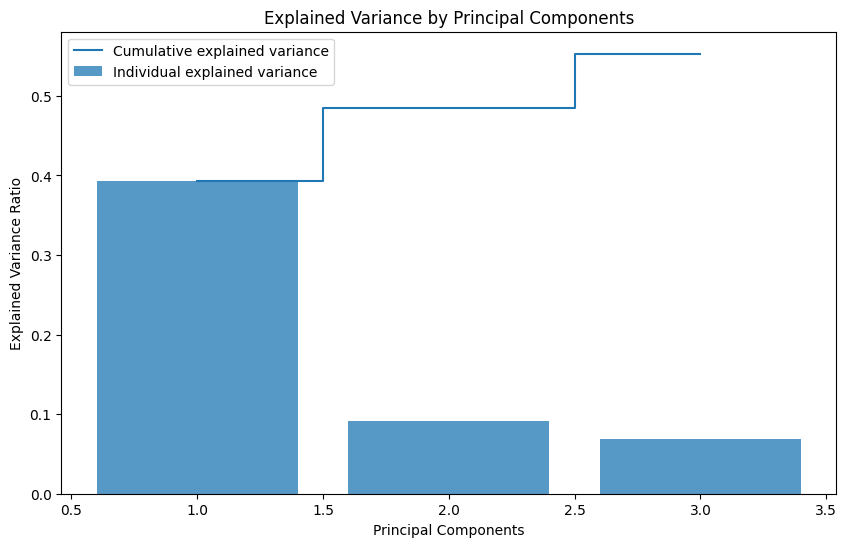

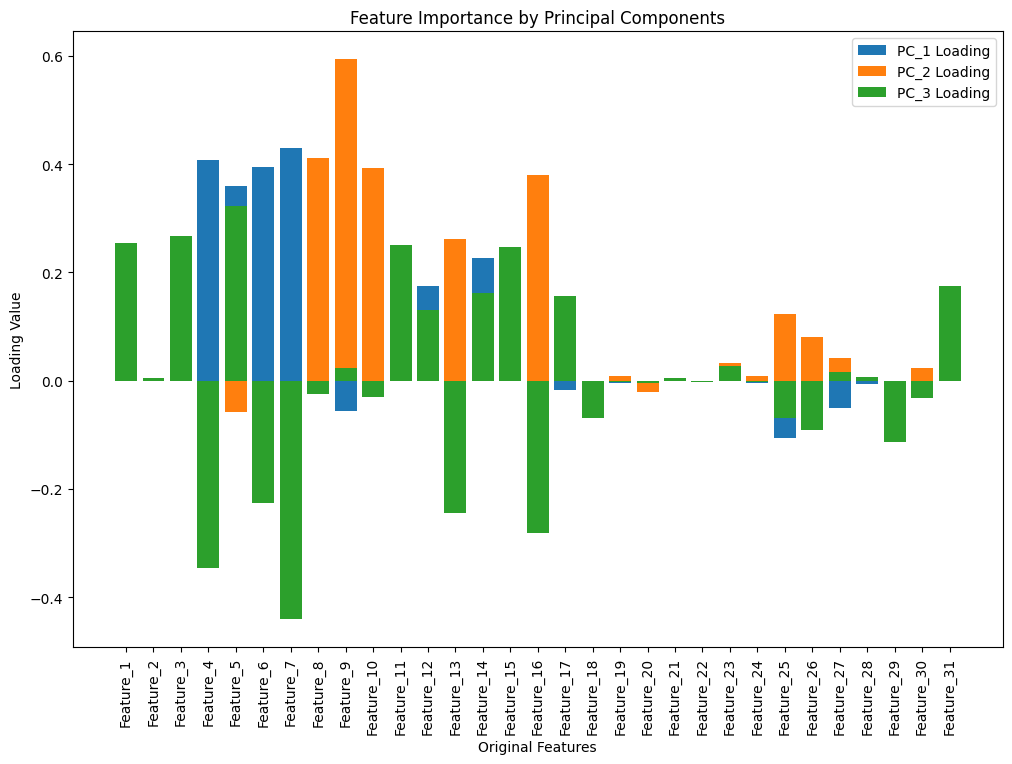

In [16]:
# Create and fit the PCA transformer on the training data
pca_transformer = PCATransformer(n_components=3)
X_train_pca_df = pca_transformer.fit_transform(X_train)



# Plot the variance explained by each principal component
pca_transformer.plot_variance()

# Plot feature importance
original_feature_names = [f"Feature_{i+1}" for i in range(X_train.shape[1])]
pca_transformer.plot_feature_importance(original_feature_names)

#### Elbow Point 

The elbow point, also known as the "elbow method" or "elbow curve," is a technique used to determine the optimal number of clusters in a dataset for clustering algorithms like k-means. The elbow point represents a balance between minimizing within-cluster variance (compactness) and maximizing between-cluster variance (separation).

WCSS


The Within-Cluster Sum of Squares (WCSS) is a useful metric in determining the optimal number of clusters in K-means clustering. The WCSS measures the compactness of the data points within each cluster. As the number of clusters increases, the WCSS tends to decrease because each data point can be assigned to a closer centroid. However, after a certain point, the improvement in WCSS diminishes significantly, resulting in a less significant decrease in subsequent iterations.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def kmeans_elbow_plot(data, max_clusters):
    # Calculate sum of squared distances for different values of k
    wcss = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=0, init='k-means++')
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)  # Append the WCSS value

    # Plot the elbow plot
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='-', color='b')
    plt.xlabel('Number of Clusters', fontsize=12)
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12)
    plt.title('Elbow Plot for K-means Clustering', fontsize=15)
    plt.grid(True, linestyle='-', linewidth=0.5, alpha=0.7)
    plt.show()

    return kmeans
    
    

g:\Resume_Projects\clustering\Customer_github\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
g:\Resume_Projects\clustering\Customer_github\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
g:\Resume_Projects\clustering\Customer_github\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
g:\Resume_Projects\clustering\Customer_github\.venv\Lib\site-packages\sklearn\cluster\_kmeans.

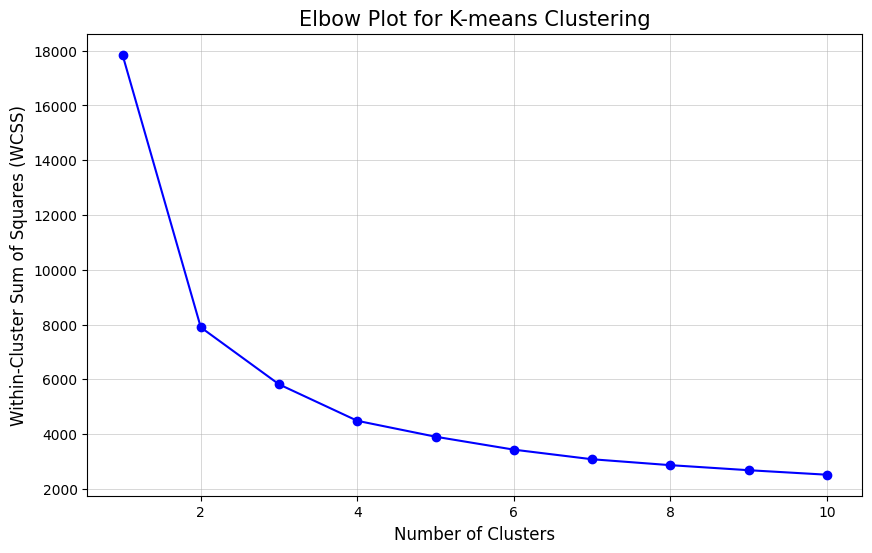

In [18]:
kmeans=kmeans_elbow_plot(X_train_pca_df,max_clusters=10)

In [19]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score, normalized_mutual_info_score


In [20]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

class Clustering:
    """
    EClustering is a class for performing clustering using various methods.
    """

    CLUSTERING_METHODS = {
        'kmeans': KMeans,
        'agglomerative': AgglomerativeClustering,
        'gmm': GaussianMixture
    }

    def __init__(self, method: str = 'kmeans', n_clusters: int = 3, n_components: int = 3):
        """
        Initialize the clustering model.

        Parameters:
        - method (str): The clustering method to use ('kmeans', 'agglomerative', 'gmm').
        - n_clusters (int): The number of clusters for kmeans and agglomerative methods.
        - n_components (int): The number of components for Gaussian Mixture Model.
        """
        self.method = method
        self.n_clusters = n_clusters
        self.n_components = n_components

        if method not in self.CLUSTERING_METHODS:
            raise ValueError(f"Unsupported clustering method: {method}")

        clustering_class = self.CLUSTERING_METHODS[method]
        if method in ['kmeans', 'agglomerative']:
            self.model = clustering_class(n_clusters=n_clusters)
        elif method == 'gmm':
            self.model = clustering_class(n_components=n_components)

    def fit(self, data):
        """
        Fit the clustering model to the input data.

        Parameters:
        - data: The input data for clustering.
        """
        self.model.fit(data)

    def predict(self, data):
        """
        Predict cluster labels for the input data.

        Parameters:
        - data: The input data for clustering.

        Returns:
        - labels: Cluster labels for each data point.
        """
        return self.model.fit_predict(data)

    def get_labels_and_method(self, data):
        """
        Get cluster labels and the clustering method for the input data.

        Parameters:
        - data: The input data for clustering.

        Returns:
        - labels: Cluster labels for each data point.
        - method: The clustering method used.
        """
        labels = self.predict(data)
        return labels, self.method

In [21]:

# Create and fit the clustering model on the data
clustering_model = Clustering(method='gmm', n_clusters=3)
clustering_model.fit(data=X_train_pca_df)

# Get cluster labels and the clustering algorithm name for training data
train_labels, method_used = clustering_model.get_labels_and_method(data=X_train_pca_df)

# Print the results for training data
print("Training Data - Cluster Labels:", train_labels)
print("Clustering Algorithm Used:", method_used)

# Add the cluster labels to the original datasets
X_train[method_used] = train_labels


Training Data - Cluster Labels: [2 0 2 ... 2 2 1]
Clustering Algorithm Used: gmm


In [22]:
df.dropna(inplace=True)

In [23]:
df[method_used] = train_labels

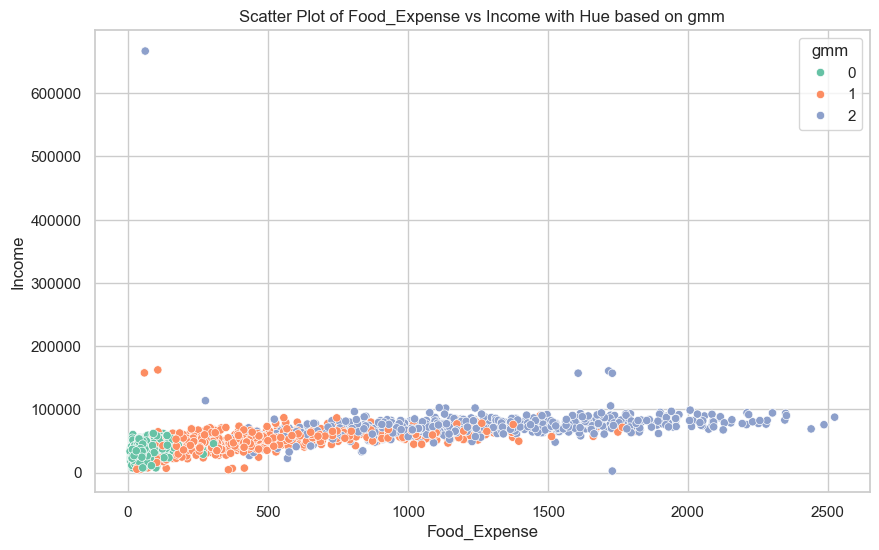

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

def scatter_plot_with_hue(data, x_col, y_col, hue_col):
    """
    Create a scatter plot with hue based on a categorical column.

    Parameters:
    - data: pandas DataFrame
    - x_col: str, name of the column for x-axis
    - y_col: str, name of the column for y-axis
    - hue_col: str, name of the categorical column for hue
    """
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))

    # Create scatter plot with hue
    sns.scatterplot(x=x_col, y=y_col, hue=hue_col, data=data, palette="Set2")

    # Customize the plot
    plt.title(f'Scatter Plot of {x_col} vs {y_col} with Hue based on {hue_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend(title=hue_col)

    # Show the plot
    plt.show()

# Assuming you have X_train and Y_train dataframes
# Replace 'Total_Expenditure' and 'Income' with your actual column names
scatter_plot_with_hue(data=df, x_col='Food_Expense', y_col='Income', hue_col=method_used)


In [25]:
#Define name of customer groups according to clusters
re_clust = {
    1: 'Avg customer',
    2: 'Potentially Good customer',
    0: 'Good customer'}
df['Clusters_Customers'] = df[method_used].map(re_clust)

g:\Resume_Projects\clustering\Customer_github\.venv\Lib\site-packages\seaborn\categorical.py:3398: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
g:\Resume_Projects\clustering\Customer_github\.venv\Lib\site-packages\seaborn\categorical.py:3398: UserWarning: 85.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
g:\Resume_Projects\clustering\Customer_github\.venv\Lib\site-packages\seaborn\categorical.py:3398: UserWarning: 26.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Hitesh\AppData\Local\Temp\ipykernel_988\88924752.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

 

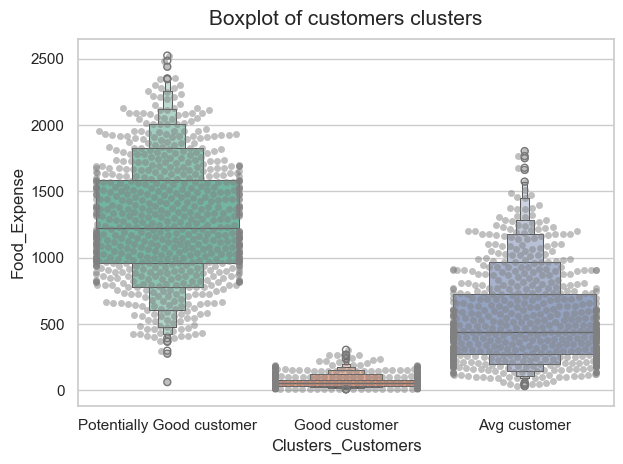

In [26]:
def plot_cluster_boxplot(df, cluster_col, y_col):
    # Set the style of the plot
    sns.set(style="whitegrid")

    # Create the box plot
    plt.figure()
    pal = sns.color_palette("Set2", df[cluster_col].nunique())
    pl = sns.swarmplot(x=df[cluster_col], y=df[y_col], color="gray", alpha=0.5)
    pl = sns.boxenplot(x=df[cluster_col], y=df[y_col], palette=pal)
    pl.set_title("Boxplot of customers clusters", pad=10, size=15)

    # Adjust the plot layout
    plt.tight_layout()

    # Show the plot
    plt.show()
    
plot_cluster_boxplot(df=df,cluster_col='Clusters_Customers',y_col='Food_Expense')

#### Gaussian Mixture Hyper paramtaer tunning

#####  Fucntions 

In [27]:
def boxplot_multiple_columns(data, columns):
    """
    Generate a box plot for multiple columns in a DataFrame.

    Parameters:
    - data: pandas DataFrame
    - columns: list of column names to include in the box plot
    """
    # Check if all columns exist in the DataFrame
    invalid_columns = [col for col in columns if col not in data.columns]
    if invalid_columns:
        raise ValueError(f"Invalid column(s): {', '.join(invalid_columns)}")

    # Create a box plot for the specified columns
    plt.figure(figsize=(10, 6))
    data[columns].boxplot()
    plt.title('Box Plot of Selected Columns')
    plt.ylabel('Values')
    plt.show()


def hist_box_plot(data, numerical_column, bin_count=20):
    """
    Generate a histogram and a box plot side by side for a numerical column in a DataFrame.

    Parameters:
    - data: pandas DataFrame
    - numerical_column: Label of the numerical column for which to create the plots
    - bin_count: Number of bins for the histogram (default is 20)

    Returns:
    - None (displays the plots)
    """
    plt.figure(figsize=(14, 6))  # Adjust the size as needed

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[numerical_column], bins=bin_count, kde=True)
    plt.title(f'Histogram for {numerical_column}')
    plt.xlabel(numerical_column)
    plt.ylabel('Frequency')

    # Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[numerical_column])
    plt.title(f'Box Plot for {numerical_column}')
    plt.xlabel(numerical_column)

    # Adjust layout to prevent overlapping
    plt.tight_layout()

    # Show the plots
    plt.show()
    
    

def plot_categorical_distribution(dataframe, column_name):
    """
    Plot the percentage distribution of a categorical column using a bar plot.

    Parameters:
    - dataframe: pandas DataFrame
    - column_name: str, the name of the categorical column to be plotted

    Returns:
    - None (displays the bar plot)
    """
    # Calculate the percentage distribution of the categorical column
    column_percentage = dataframe[column_name].value_counts(normalize=True) * 100

    plt.figure(figsize=(10, 6))
    sns.barplot(x=column_percentage.index, y=column_percentage.values, palette='viridis')
    plt.title(f'{column_name} Percentage Distribution')
    plt.xlabel(column_name)
    plt.ylabel('Percentage')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    plt.show()

    # Print the percentages for each category
    for category, percentage in column_percentage.items():
        print(f"{column_name}: {category}, Percentage: {percentage:.2f}%")

def median_plot_categorical_numerical(data, categorical_column, numerical_column, title='Median Plot'):
    """
    Create a median plot to visualize the distribution of a numerical column across categories.

    Parameters:
    - data: DataFrame
    - categorical_column: str
        The name of the categorical column.
    - numerical_column: str
        The name of the numerical column.
    - title: str, optional (default='Median Plot')
        The title of the plot.

    Returns:
    - None (displays the plot)
    """
    plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
    sns.pointplot(x=categorical_column, y=numerical_column, data=data, estimator='median', ci=None)
    plt.title(title)
    plt.show()
def plot_discrete_data(df, column_name):
    value_counts = df[column_name].value_counts().sort_index()
    total_count = value_counts.sum()
    percentages = (value_counts / total_count) * 100

    plt.figure(figsize=(10, 6))
    plt.bar(value_counts.index, value_counts.values, color='lightblue', edgecolor='k')
    plt.title(f"Bar Plot for '{column_name}' Column", fontsize=14)
    plt.xlabel('Values', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add percentage labels
    for i, count in enumerate(value_counts):
        percentage = percentages[i]
        plt.text(value_counts.index[i], count + 0.5, f"{percentage:.2f}%", ha='center', fontsize=10)

    plt.tight_layout()
    plt.show()  
    
def box_plot_categorical_numerical(data, categorical_column, numerical_column, title='Box Plot'):
    """
    Create a box plot to visualize the distribution of a numerical column across categories.

    Parameters:
    - data: DataFrame
    - categorical_column: str
        The name of the categorical column.
    - numerical_column: str
        The name of the numerical column.
    - title: str, optional (default='Box Plot')
        The title of the plot.

    Returns:
    - None (displays the plot)
    """
    plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
    sns.boxplot(x=categorical_column, y=numerical_column, data=data)
    plt.title(title)
    plt.show()     
        
def plot_categorical_hue(dataframe, x_column, hue_column):
    """
    Plot a percentage distribution of a categorical column with unique values of another column as hue.

    Parameters:
    - dataframe: pandas DataFrame
    - x_column: str, the name of the column to be plotted on the x-axis
    - hue_column: str, the name of the column to be used as hue

    Returns:
    - None (displays the plot)
    """
    # Calculate the percentage distribution of the categorical column with hue
    data_percentage = dataframe.groupby([x_column, hue_column]).size().reset_index(name='count')
    data_percentage['percentage'] = (data_percentage['count'] / data_percentage['count'].sum()) * 100

    plt.figure(figsize=(12, 8))
    sns.barplot(x=x_column, y='percentage', hue=hue_column, data=data_percentage, palette='viridis')
    plt.title(f'{x_column} with {hue_column} as Hue - Percentage Distribution')
    plt.xlabel(x_column)
    plt.ylabel('Percentage')
    plt.show()

    # Print the percentages for each category
    for index, row in data_percentage.iterrows():
        print(f"{x_column}: {row[x_column]}, {hue_column}: {row[hue_column]}, Percentage: {row['percentage']:.2f}%")


def plot_heatmap(df, column):
    """
    Generate a heatmap for a specific column in the given DataFrame.

    Parameters:
    - df: DataFrame, the input dataframe.
    - column: str, the column for which the heatmap should be generated.
    """
    # Pivot the dataframe to create a heatmap-friendly format
    heatmap_data = df.pivot_table(index='Year', columns=column, aggfunc='size', fill_value=0)

    # Create the heatmap using Seaborn
    plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
    sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g', linewidths=.5)

    # Set plot labels and title
    plt.xlabel(column)
    plt.ylabel('Year')
    plt.title(f'Heatmap of {column} Over the Years')

    # Show the plot
    plt.show()
    
    
def remove_outliers(df, column_name, lower_quantile=0.05, upper_quantile=0.95):
    """
    Remove outliers from a numerical column in a DataFrame using quantiles.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the data.
    - column_name (str): The name of the numerical column with outliers.
    - lower_quantile (float): The lower quantile threshold to identify outliers.
    - upper_quantile (float): The upper quantile threshold to identify outliers.

    Returns:
    - pd.DataFrame: The DataFrame with outliers removed.
    """
    # Find the quantiles
    lower_bound = df[column_name].quantile(lower_quantile)
    upper_bound = df[column_name].quantile(upper_quantile)

    # Remove outliers
    df_filtered = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    return df_filtered


def median_plot(data, numeric_column, categorical_column, categories=None):
    """
    Plot median plot for specific categories in a categorical column.

    Parameters:
    - data: DataFrame containing the data
    - numeric_column: Name of the numeric column for which median will be calculated
    - categorical_column: Name of the categorical column for which median plot will be created
    - categories: List of specific categories to include in the plot (default is None, which includes all categories)
    """

    # Filter the data based on specified categories if provided
    if categories is not None:
        data = data[data[categorical_column].isin(categories)]

    # Group by the categorical column and calculate the median for the numeric column
    grouped_data = data.groupby(categorical_column)[numeric_column].median().reset_index()

    # Set the style of seaborn for better visualization
    sns.set(style="whitegrid")

    # Create the median plot using seaborn
    plt.figure(figsize=(10, 6))
    median_plot = sns.barplot(x=categorical_column, y=numeric_column, data=grouped_data, ci=None)
    median_plot.set(title=f'Median Plot for {numeric_column} by {categorical_column}', xlabel=categorical_column, ylabel=f'Median {numeric_column}')

    # Show the plot
    plt.show()

##### Cluster Analysis

In [28]:
df_cluster=df.copy()

In [29]:
df_cluster

,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,...,Response,Food_Expense,Age,Living_With,Is_Parent,Total_Offsprings,online_purchase_ratio,age_category,gmm,Clusters_Customers
0,Graduate,Single,58138.0,58,635,88,546,172,88,88,...,1,1617,67,Alone,0,0,0.363636,60-90,2,Potentially Good customer
1,Graduate,Single,46344.0,38,11,1,6,2,1,6,...,0,27,70,Alone,1,2,0.250000,60-90,1,Avg customer
2,Graduate,In a Relationship,71613.0,26,426,49,127,111,21,42,...,0,776,59,Partner,0,0,0.400000,50-59,2,Potentially Good customer
3,Graduate,In a Relationship,26646.0,26,11,4,20,10,3,5,...,0,53,40,Partner,1,1,0.333333,40-49,1,Avg customer
4,Postgraduate,In a Relationship,58293.0,94,173,43,118,46,27,15,...,0,422,43,Partner,1,1,0.357143,40-49,0,Good customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,Graduate,In a Relationship,61223.0,46,709,43,182,42,118,247,...,0,1341,57,Partner,1,1,0.562500,50-59,2,Potentially Good customer
2126,Postgraduate,In a Relationship,64014.0,56,406,0,30,0,0,8,...,0,444,78,Partner,1,3,0.533333,60-90,0,Good customer
2127,Graduate,Divorced,56981.0,91,908,48,217,32,12,24,...,0,1241,43,Alone,0,0,0.111111,40-49,2,Potentially Good customer
2128,Postgraduate,In a Relationship,69245.0,8,428,30,214,80,30,61,...,0,843,68,Partner,1,1,0.285714,60-90,2,Potentially Good customer


C:\Users\Hitesh\AppData\Local\Temp\ipykernel_9396\3723170402.py:159: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_percentage = dataframe.groupby([x_column, hue_column]).size().reset_index(name='count')
g:\Resume_Projects\clustering\Customer_github\.venv\Lib\site-packages\seaborn-0.13.1-py3.11.egg\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
g:\Resume_Projects\clustering\Customer_github\.venv\Lib\site-packages\seaborn-0.13.1-py3.11.egg\seaborn\categorical.py:1281: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a fut

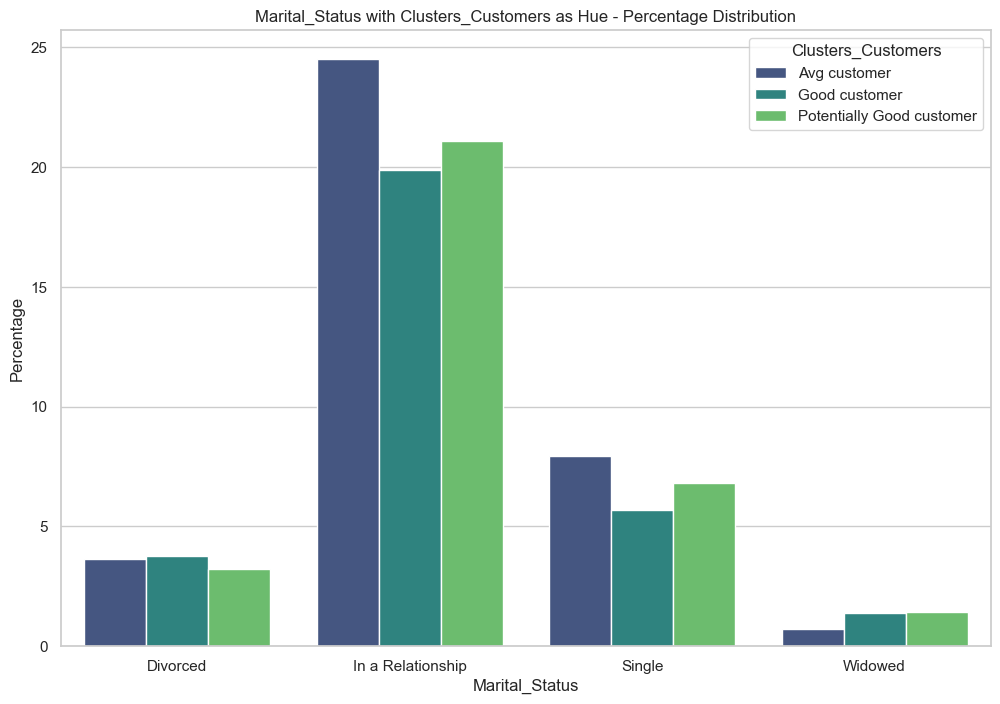

Marital_Status: Divorced, Clusters_Customers: Avg customer, Percentage: 3.62%
Marital_Status: Divorced, Clusters_Customers: Good customer, Percentage: 3.76%
Marital_Status: Divorced, Clusters_Customers: Potentially Good customer, Percentage: 3.24%
Marital_Status: In a Relationship, Clusters_Customers: Avg customer, Percentage: 24.50%
Marital_Status: In a Relationship, Clusters_Customers: Good customer, Percentage: 19.89%
Marital_Status: In a Relationship, Clusters_Customers: Potentially Good customer, Percentage: 21.08%
Marital_Status: Single, Clusters_Customers: Avg customer, Percentage: 7.94%
Marital_Status: Single, Clusters_Customers: Good customer, Percentage: 5.66%
Marital_Status: Single, Clusters_Customers: Potentially Good customer, Percentage: 6.80%
Marital_Status: Widowed, Clusters_Customers: Avg customer, Percentage: 0.71%
Marital_Status: Widowed, Clusters_Customers: Good customer, Percentage: 1.38%
Marital_Status: Widowed, Clusters_Customers: Potentially Good customer, Perce

In [30]:
plot_categorical_hue(dataframe=df_cluster,x_column='Marital_Status',hue_column='Clusters_Customers')

Customers having martial status as relationship are hte highest belonging to overall purcheses hence highest number of Good customers belongs to these catgory 
- Marital_Status: In a Relationship, Clusters_Customers: Avg customer, Percentage: 24.07%
- Marital_Status: In a Relationship, Clusters_Customers: Good customer, Percentage: 21.27%
- Marital_Status: In a Relationship, Clusters_Customers: Potentially Good customer, Percentage: 20.12%

In [31]:
df_cluster.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'Wines', 'Fruits',
       'Meat', 'Fish', 'Sweet', 'Gold', 'DealsPurchases', 'Web', 'Catalog',
       'Store', 'WebVisitsMonth', 'Complain', 'Response', 'Food_Expense',
       'Age', 'Living_With', 'Is_Parent', 'Total_Offsprings',
       'online_purchase_ratio', 'age_category', 'gmm', 'Clusters_Customers'],
      dtype='object')

C:\Users\Hitesh\AppData\Local\Temp\ipykernel_9396\3723170402.py:159: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_percentage = dataframe.groupby([x_column, hue_column]).size().reset_index(name='count')
g:\Resume_Projects\clustering\Customer_github\.venv\Lib\site-packages\seaborn-0.13.1-py3.11.egg\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
g:\Resume_Projects\clustering\Customer_github\.venv\Lib\site-packages\seaborn-0.13.1-py3.11.egg\seaborn\categorical.py:1281: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a fut

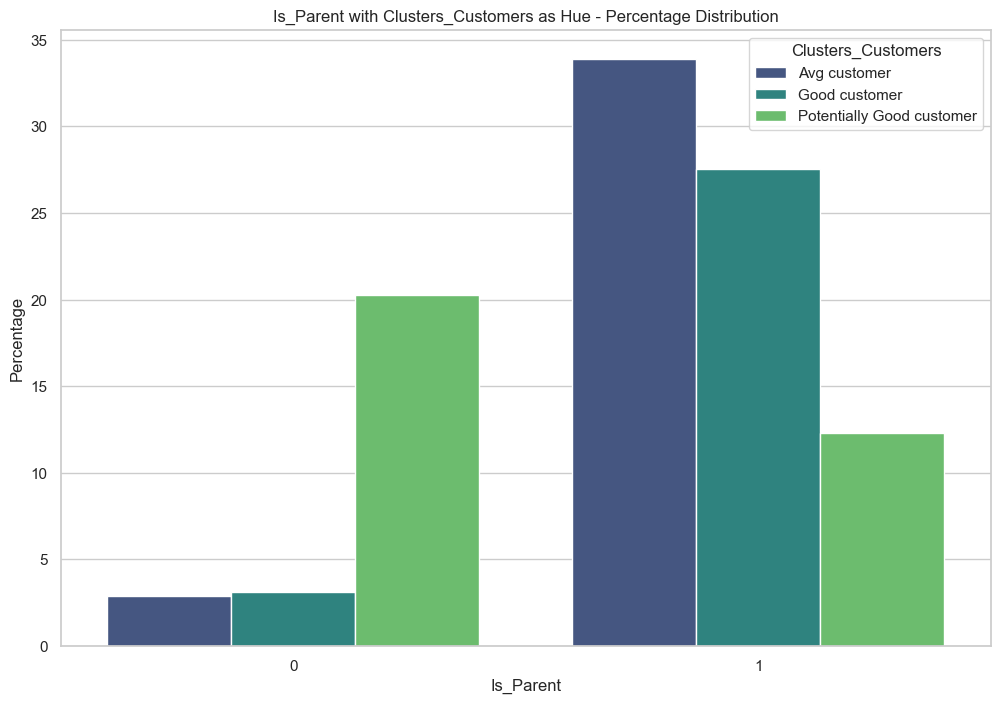

Is_Parent: 0, Clusters_Customers: Avg customer, Percentage: 2.90%
Is_Parent: 0, Clusters_Customers: Good customer, Percentage: 3.14%
Is_Parent: 0, Clusters_Customers: Potentially Good customer, Percentage: 20.27%
Is_Parent: 1, Clusters_Customers: Avg customer, Percentage: 33.87%
Is_Parent: 1, Clusters_Customers: Good customer, Percentage: 27.55%
Is_Parent: 1, Clusters_Customers: Potentially Good customer, Percentage: 12.27%


In [32]:
plot_categorical_hue(dataframe=df_cluster,x_column='Is_Parent',hue_column='Clusters_Customers')

C:\Users\Hitesh\AppData\Local\Temp\ipykernel_9396\3723170402.py:159: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_percentage = dataframe.groupby([x_column, hue_column]).size().reset_index(name='count')
g:\Resume_Projects\clustering\Customer_github\.venv\Lib\site-packages\seaborn-0.13.1-py3.11.egg\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
g:\Resume_Projects\clustering\Customer_github\.venv\Lib\site-packages\seaborn-0.13.1-py3.11.egg\seaborn\categorical.py:1281: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a fut

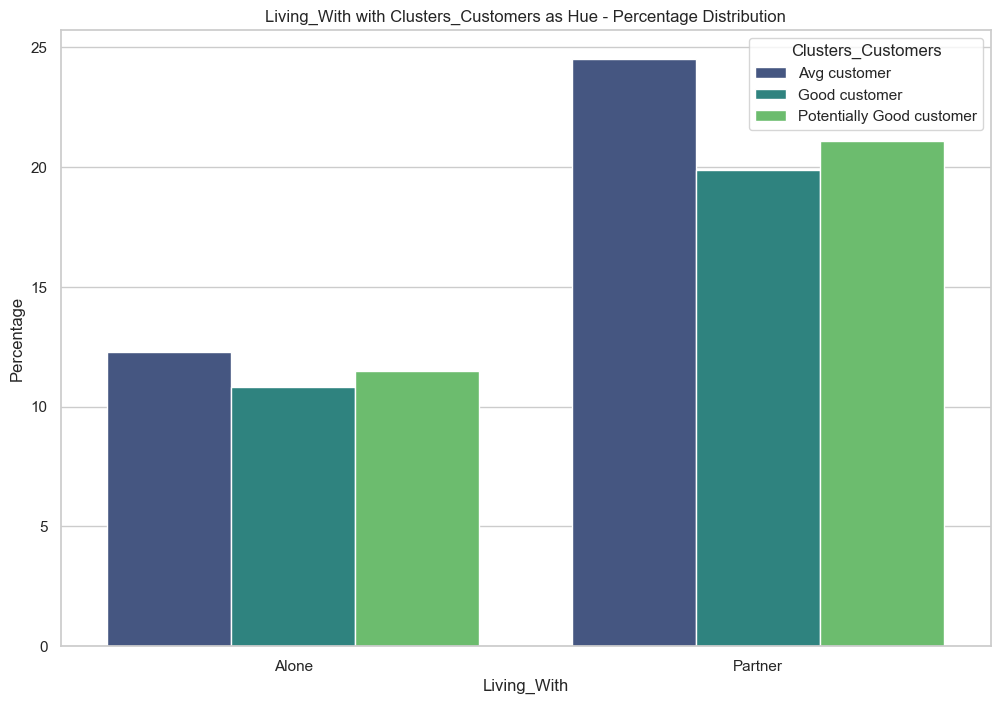

Living_With: Alone, Clusters_Customers: Avg customer, Percentage: 12.27%
Living_With: Alone, Clusters_Customers: Good customer, Percentage: 10.80%
Living_With: Alone, Clusters_Customers: Potentially Good customer, Percentage: 11.47%
Living_With: Partner, Clusters_Customers: Avg customer, Percentage: 24.50%
Living_With: Partner, Clusters_Customers: Good customer, Percentage: 19.89%
Living_With: Partner, Clusters_Customers: Potentially Good customer, Percentage: 21.08%


In [33]:
plot_categorical_hue(dataframe=df_cluster,x_column='Living_With',hue_column='Clusters_Customers')

g:\Resume_Projects\clustering\Customer_github\.venv\Lib\site-packages\seaborn-0.13.1-py3.11.egg\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


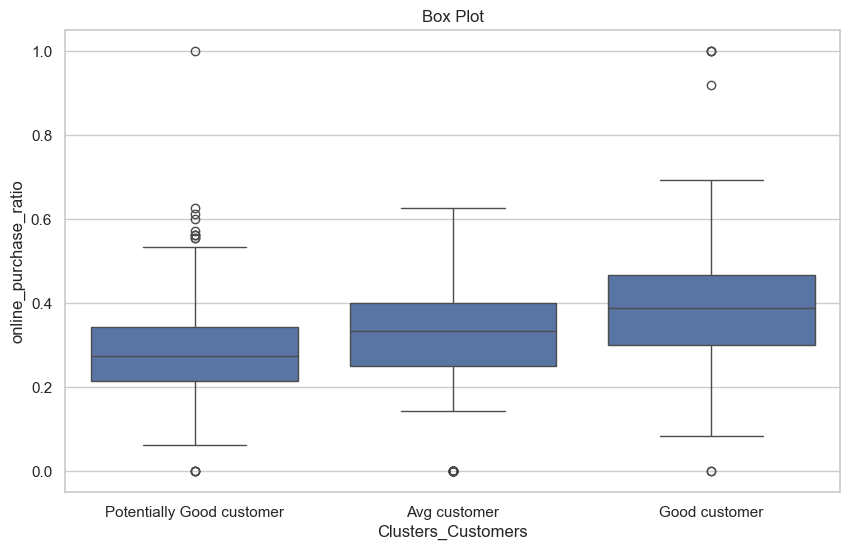

In [34]:
def box_plot_categorical_numerical(data, categorical_column, numerical_column, title='Box Plot'):
    """
    Create a box plot to visualize the distribution of a numerical column across categories.

    Parameters:
    - data: DataFrame
    - categorical_column: str
        The name of the categorical column.
    - numerical_column: str
        The name of the numerical column.
    - title: str, optional (default='Box Plot')
        The title of the plot.

    Returns:
    - None (displays the plot)
    """
    plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
    sns.boxplot(x=categorical_column, y=numerical_column, data=data)
    plt.title(title)
    plt.show()     
    
box_plot_categorical_numerical(df_cluster, 'Clusters_Customers', 'online_purchase_ratio', title='Box Plot')

g:\Resume_Projects\clustering\Customer_github\.venv\Lib\site-packages\seaborn-0.13.1-py3.11.egg\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


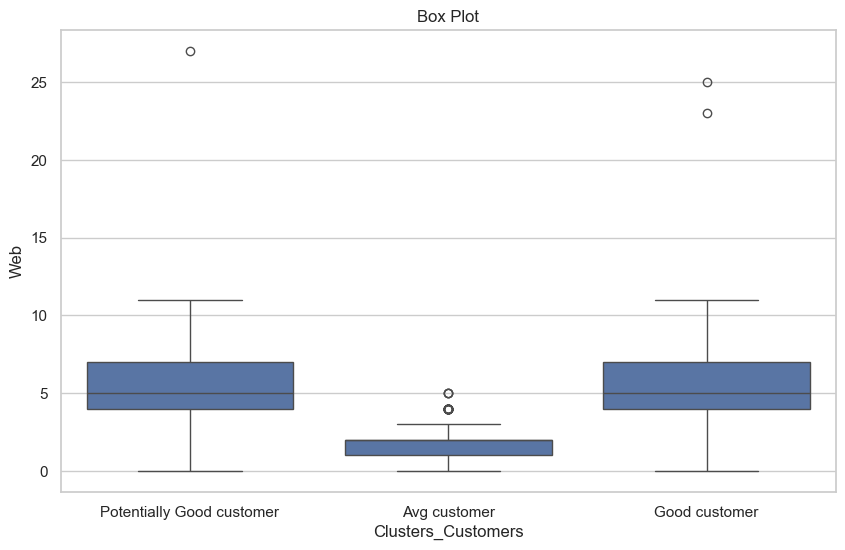

In [35]:
box_plot_categorical_numerical(df_cluster, 'Clusters_Customers', 'Web', title='Box Plot')

g:\Resume_Projects\clustering\Customer_github\.venv\Lib\site-packages\seaborn-0.13.1-py3.11.egg\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
g:\Resume_Projects\clustering\Customer_github\.venv\Lib\site-packages\seaborn-0.13.1-py3.11.egg\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
g:\Resume_Projects\clustering\Customer_github\.venv\Lib\site-packages\seaborn-0.13.1-py3.11.egg\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


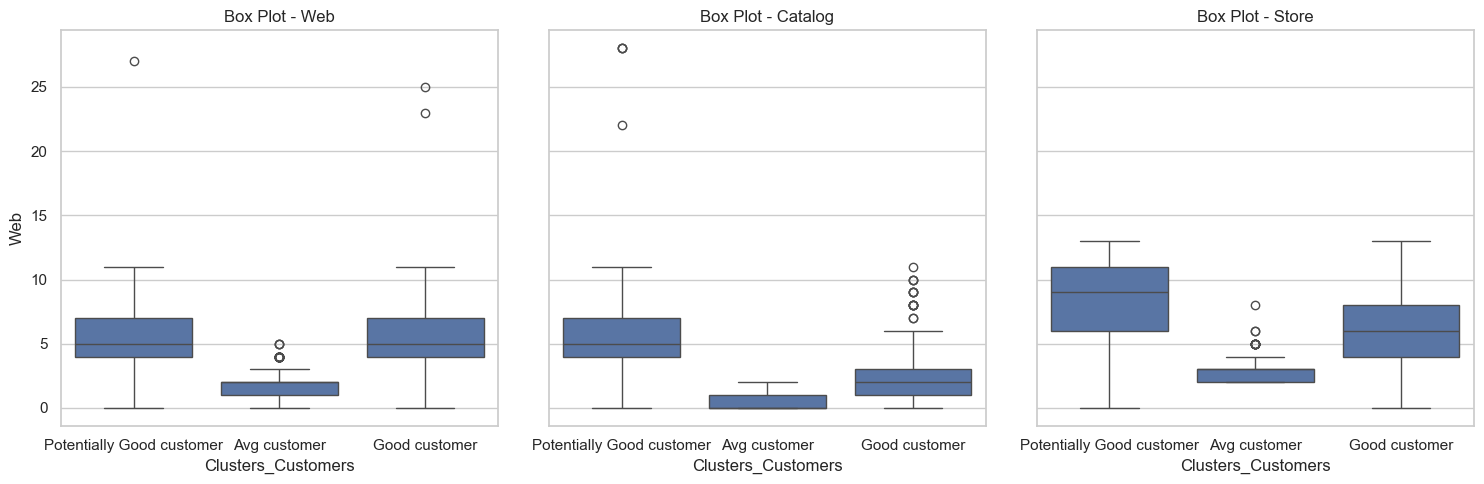

g:\Resume_Projects\clustering\Customer_github\.venv\Lib\site-packages\seaborn-0.13.1-py3.11.egg\seaborn\categorical.py:1210: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)
g:\Resume_Projects\clustering\Customer_github\.venv\Lib\site-packages\seaborn-0.13.1-py3.11.egg\seaborn\categorical.py:1210: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)
g:\Resume_Projects\clu

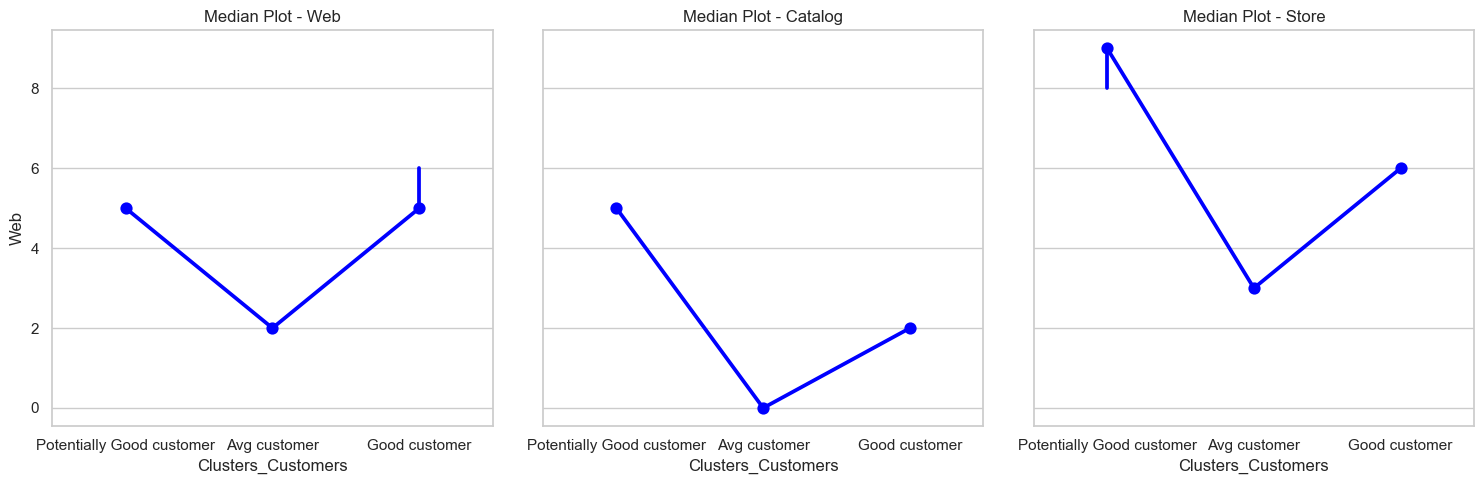

In [36]:
def side_by_side_boxplots(data, categorical_column, numerical_columns):
    """
    Generate side-by-side box plots for numerical columns grouped by a categorical column.

    Parameters:
    - data: DataFrame containing the data.
    - categorical_column: Name of the categorical column.
    - numerical_columns: List of names of numerical columns.

    Returns:
    - None (plots the box plots).
    """
    # Set up the figure with subplots
    num_plots = len(numerical_columns)
    fig, axes = plt.subplots(1, num_plots, figsize=(5 * num_plots, 5), sharey=True)

    # Create box plots for each numerical column, grouped by the categorical column
    for i, numerical_column in enumerate(numerical_columns):
        sns.boxplot(x=categorical_column, y=numerical_column, data=data, ax=axes[i])
        axes[i].set_title(f'Box Plot - {numerical_column}')

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()
    

def side_by_side_median_plots(data, categorical_column, numerical_columns):
    """
    Generate side-by-side median plots for numerical columns grouped by a categorical column.

    Parameters:
    - data: DataFrame containing the data.
    - categorical_column: Name of the categorical column.
    - numerical_columns: List of names of numerical columns.

    Returns:
    - None (plots the median plots).
    """
    # Set up the figure with subplots
    num_plots = len(numerical_columns)
    fig, axes = plt.subplots(1, num_plots, figsize=(5 * num_plots, 5), sharey=True)

    # Create median plots for each numerical column, grouped by the categorical column
    for i, numerical_column in enumerate(numerical_columns):
        # Median plot
        sns.pointplot(x=categorical_column, y=numerical_column, data=data, estimator=np.median, color='blue', ax=axes[i])
        axes[i].set_title(f'Median Plot - {numerical_column}')

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

    
numerical_columns= [ 'Web', 'Catalog','Store']
side_by_side_boxplots(df_cluster, 'Clusters_Customers', numerical_columns)

numerical_columns = ['Web', 'Catalog', 'Store']
side_by_side_median_plots(df_cluster, 'Clusters_Customers', numerical_columns)

In [37]:

df_cluster.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'Wines', 'Fruits',
       'Meat', 'Fish', 'Sweet', 'Gold', 'DealsPurchases', 'Web', 'Catalog',
       'Store', 'WebVisitsMonth', 'Complain', 'Response', 'Food_Expense',
       'Age', 'Living_With', 'Is_Parent', 'Total_Offsprings',
       'online_purchase_ratio', 'age_category', 'gmm', 'Clusters_Customers'],
      dtype='object')